In [ ]:
!pip install opencv-python
!pip install dtcwt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 852.5 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dtcwt: filename=dtcwt-0.14.0-py3-none-any.whl size=89103 sha256=a70996850127f820cc83b19df87451da33e78a5ec82a06d0561de7ec50d95085
  Stored in directory: /root/.cache/pip/wheels/98/42/03/b5cb6017bd3c6df1ac69ee5e737c0e2bd16304dfd9da5f7026
Successfully built dtcwt


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from google.colab import files
from google.colab import drive
import glob
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import os
import cv2
import matplotlib.pyplot as plt
import dtcwt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/suryathecreator/Retinoblastoma/main/benign-and-malignant-images-labels-final.csv")
print(df.head())

   file_name benign_malignant
0          1        malignant
1          2        malignant
2          3        malignant
3          4        malignant
4          5        malignant


In [ ]:
#directory = r'C:\Users\USER\Desktop\PRANAV BITS\Retinoblastoma-main-git\data'
directory = '/content'

In [ ]:
image_list = []
for i in range(1, 282):
    filename = os.path.join(directory, str(i) + ".jpg")
    if os.path.exists(filename):
        image = load_img(filename, target_size=(224, 224))
        image_list.append(np.array(image))
    else:
        print(f"Warning: File not found: {filename}")

In [ ]:
for i in range(281):
    if df['benign_malignant'][i] == "malignant":
        df['benign_malignant'][i] = 1
    elif df['benign_malignant'][i] == "benign":
        df['benign_malignant'][i] = 0
    else:
        df['benign_malignant'][i] = -1

<ipython-input-6-b4a3486c654e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['benign_malignant'][i] = 1
<ipython-input-6-b4a3486c654e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['benign_malignant'][i] = 1
<ipython-input-6-b4a3486c654e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['benign_malignant'][i] = 1
<ipython-input-6-b4a3486c654e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [ ]:
df['images'] = image_list
print(df.head())

   file_name benign_malignant  \
0          1                1   
1          2                1   
2          3                1   
3          4                1   
4          5                1   

                                              images  
0  [[[23, 23, 21], [23, 23, 21], [23, 23, 21], [2...  
1  [[[17, 16, 14], [17, 16, 14], [17, 16, 14], [1...  
2  [[[2, 2, 2], [2, 2, 2], [2, 2, 2], [2, 2, 2], ...  
3  [[[52, 52, 52], [27, 27, 27], [29, 29, 29], [2...  
4  [[[5, 4, 2], [5, 4, 2], [5, 4, 2], [5, 4, 2], ...  


In [ ]:
dataframeShuffled = shuffle(df)
dataframeShuffled.head()

,file_name,benign_malignant,images
153,154,0,"[[[1, 1, 1], [2, 0, 1], [2, 0, 1], [1, 1, 1], ..."
86,87,1,"[[[31, 31, 33], [17, 17, 19], [15, 15, 17], [1..."
186,187,0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
184,185,0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
16,17,1,"[[[6, 0, 10], [4, 0, 10], [4, 0, 10], [5, 0, 1..."


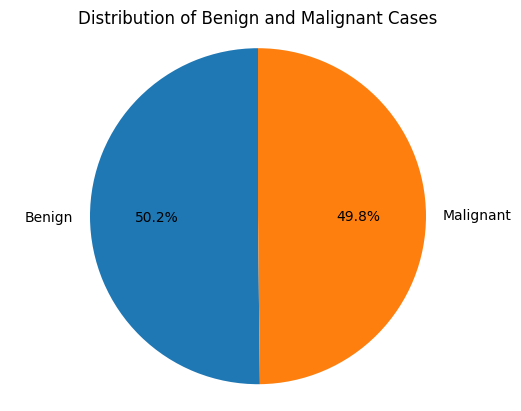

In [ ]:
# @title Distribution of Benign and Malignant Cases

import matplotlib.pyplot as plt

# Count the occurrences of each class
counts = df['benign_malignant'].value_counts()

# Create a pie chart
plt.pie(counts, labels=['Benign', 'Malignant'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
_ = plt.title('Distribution of Benign and Malignant Cases')


In [ ]:
train_ds, test_ds, train_labels, test_labels = train_test_split(dataframeShuffled['images'].tolist(), dataframeShuffled['benign_malignant'], test_size =  0.33, random_state = 1)
train_labels_processed = to_categorical(train_labels, num_classes=5)
test_labels_processed = to_categorical(test_labels, num_classes=5)

In [ ]:
print(train_labels_processed)
#print("break")
#print(test_labels_processed)



[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0.

In [ ]:
base_model = VGG19(weights="imagenet", include_top=False, input_shape=train_ds[0].shape)
base_model.trainable = False






80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
train_ds = tf.image.resize(train_ds, (224,224))
test_ds = tf.image.resize(test_ds, (224,224))


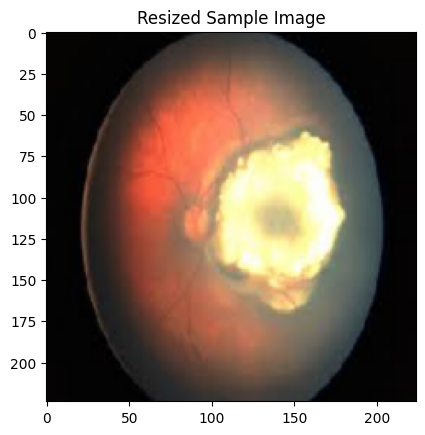

In [ ]:
#plot sample resized

# Assuming 'train_ds' is your TensorFlow dataset after resizing
# Extract a single image for plotting
sample_image = train_ds[8]


# Convert the TensorFlow tensor to a NumPy array
sample_image_np = sample_image.numpy()

# Plot the image
plt.imshow(sample_image_np.astype("uint8"))
plt.title("Resized Sample Image")
plt.show()

In [ ]:
def apply_gaussian_blur(image_list, kernel_size=(5, 5), sigma=0):
    blurred_images = []
    for image_tensor in image_list:
        # Convert TensorFlow tensor to NumPy array
        image_array = image_tensor.numpy()

        # Ensure image array is of type np.uint8 or np.float32
        if not isinstance(image_array, np.ndarray):
            raise ValueError("Input image_array must be a NumPy array")

        # Convert image to np.float32 if not already
        if image_array.dtype != np.float32:
            image_array = image_array.astype(np.float32)

        # Apply Gaussian blur
        blurred_image = cv2.GaussianBlur(image_array, kernel_size, sigma)

        # Convert blurred image back to np.uint8
        blurred_image = blurred_image.astype(np.uint8)

        blurred_images.append(blurred_image)

    return np.array(blurred_images)


In [ ]:
train_ds_denoise = apply_gaussian_blur(train_ds)
test_ds_denoise = apply_gaussian_blur(test_ds)



In [ ]:
#check if the output b&w
print(train_ds_denoise[1].shape)

(224, 224, 3)


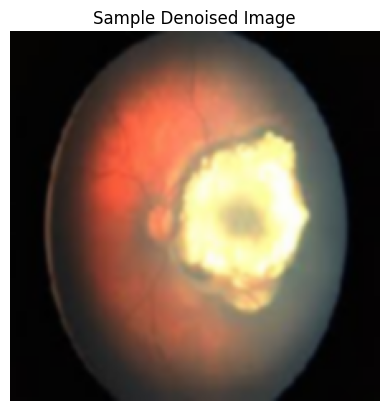

In [ ]:
#plot
sample_image = train_ds_denoise[8]
plt.imshow(sample_image.astype(np.uint8))  # Removed .numpy() as it's already a NumPy array
plt.axis('off')
plt.title('Sample Denoised Image')
plt.show()



normalise

In [ ]:
def normalize_images(image_list):
    normalized_images = []
    for image in image_list:
        # Normalize the image to the range [-1, 1]
        normalized_image = (image / 127.5) - 1
        normalized_images.append(normalized_image)

    return np.array(normalized_images)

In [ ]:
# normalise
train_ds_normalised = normalize_images(train_ds_denoise)
test_ds_normalised = normalize_images(test_ds_denoise)


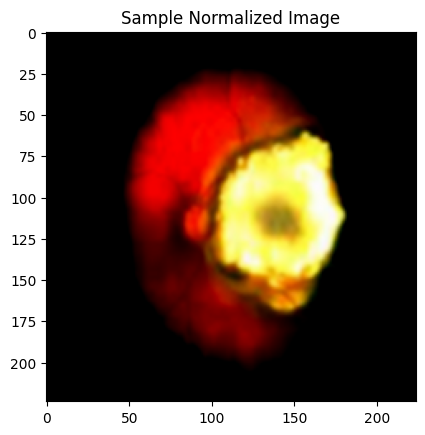

In [ ]:
#plot_normalised
sample_image = train_ds_normalised[8]
plt.imshow(sample_image)
plt.title('Sample Normalized Image')
plt.show()

In [ ]:
# #greyscale
# def rgb_to_grayscale(rgb_images):
#     grayscale_images = []
#     for rgb_image in rgb_images:
#         # Use a standard formula for RGB to grayscale conversion
#         grayscale_image = np.dot(rgb_image[...,:3], [0.2989, 0.5870, 0.1140])
#         grayscale_images.append(grayscale_image)
#     return grayscale_images

In [ ]:
# train_ds_grayscale = rgb_to_grayscale(train_ds)
# test_ds_grayscale = rgb_to_grayscale(test_ds)

In [ ]:
# sample_image_train = train_ds_grayscale[0]
# plt.imshow(sample_image_train, cmap='gray')
# plt.title('Sample Grayscale Image (Train)')
# plt.show()


In [ ]:
# print(train_ds_grayscale[1].shape)
# print(test_ds_grayscale[1].shape)


In [ ]:
# #CHECK
# def check_grayscale(image_list):
#     for image in image_list:
#         if len(image.shape) == 2:
#             print("Image is grayscale.")
#         else:
#             print("Image is not grayscale.")

# # Example usage (assuming 'train_ds_clahe' is your list of images)
# check_grayscale(train_ds_grayscale)

CLAHE

In [ ]:
# def apply_clahe(image_list):
#     clahe_images = []
#     clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))  # Adjust parameters as needed

#     for image_array in image_list:
#         # Ensure the image is in the correct format (8-bit unsigned single channel)
#         # Scale the normalized image from [-1, 1] to [0, 255]
#         image_array = ((image_array + 1) * 127.5).astype(np.uint8)

#         # Convert the image to LAB color space
#         lab = cv2.cvtColor(image_array, cv2.COLOR_RGB2LAB)

#         # Split the LAB image into different channels
#         l, a, b = cv2.split(lab)

#         # Apply CLAHE to the L channel
#         cl = clahe.apply(l)

#         # Merge the CLAHE enhanced L channel with the a and b channels
#         limg = cv2.merge((cl, a, b))

#         # Convert the LAB image back to RGB color space
#         clahe_image = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)

#         # Normalize the CLAHE image back to [-1, 1] range
#         clahe_image = (clahe_image / 127.5) - 1.0

#         clahe_images.append(clahe_image)

#     return np.array(clahe_images)

In [ ]:
# #apply clache
# train_ds_clahe = apply_clahe(train_ds_normalised)
# test_ds_clahe = apply_clahe(test_ds_normalised)


In [ ]:
# #SHOW SAMPLE
# # Plot a sample image from the training set
# import matplotlib.pyplot as plt
# sample_image_train = train_ds_clahe[8]
# plt.imshow(sample_image_train, cmap='gray')
# plt.title('Sample CLAHE Image (Train)')
# plt.show()

# # Plot a sample image from the test set
# sample_image_test = test_ds_clahe[0]
# plt.imshow(sample_image_test, cmap='gray')
# plt.title('Sample CLAHE Image (Test)')
# plt.show()


DUAL TREE COMPLEX WAVELET TRANSFORM

In [ ]:
def pad_image(image, target_size=(300, 300)):
    """
    Pad the image to the target size with duplicated rows and columns.
    """
    padded_image = np.pad(image, (
        (0, target_size[0] - image.shape[0]),
        (0, target_size[1] - image.shape[1]),
        (0, 0)
    ), mode='edge')
    return padded_image

def apply_dtcwt(image_list):
    enhanced_images = []
    transform = dtcwt.Transform2d()

    for image in image_list:
        # Pad the image to the target size
        padded_image = pad_image(image)

        # Apply DTCWT on each color channel separately
        channels = cv2.split(padded_image)
        enhanced_channels = []

        for channel in channels:
            channel = channel.astype(np.float32)
            coeffs = transform.forward(channel)

            gain = 2.0
            for scale in range(len(coeffs.highpasses)):
                for direction in range(coeffs.highpasses[scale].shape[-1]):
                    coeffs.highpasses[scale][:, :, direction] *= gain

            enhanced_channel = transform.inverse(coeffs)
            enhanced_channel = cv2.normalize(enhanced_channel, None, 0, 1, cv2.NORM_MINMAX)
            enhanced_channels.append(enhanced_channel)

        # Merge the enhanced channels back
        enhanced_image = cv2.merge(enhanced_channels)

        # Remove the padding to return to original size
        enhanced_image = enhanced_image[:image.shape[0], :image.shape[1], :]

        enhanced_images.append(enhanced_image)

    return np.array(enhanced_images)


In [ ]:
#apply dtwct
train_ds_dtcwt = apply_dtcwt(train_ds_normalised)
test_ds_dtcwt = apply_dtcwt(test_ds_normalised)

In [ ]:
#check if the output b&w
print(train_ds_dtcwt[1].shape)

(224, 224, 3)


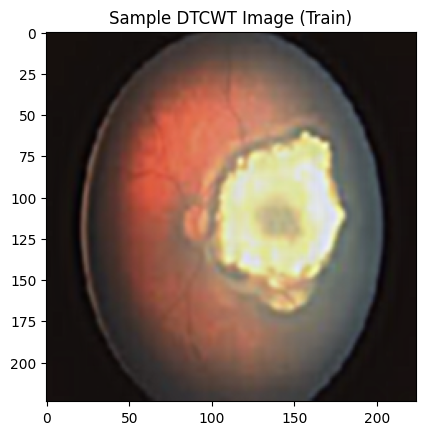

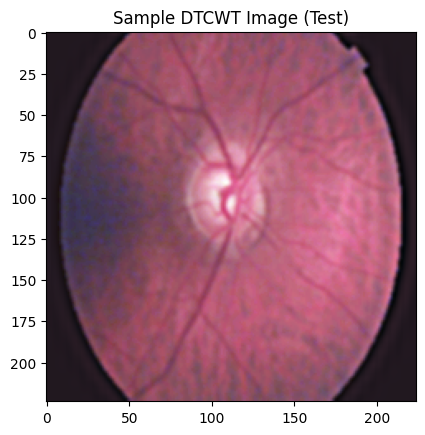

In [ ]:
#SHOW SAMPLE
# Plot a sample image from the training set
import matplotlib.pyplot as plt
sample_image_train = train_ds_dtcwt[8]
plt.imshow(sample_image_train, cmap='gray')
plt.title('Sample DTCWT Image (Train)')
plt.show()

# Plot a sample image from the test set
sample_image_test = test_ds_dtcwt[0]
plt.imshow(sample_image_test, cmap='gray')
plt.title('Sample DTCWT Image (Test)')
plt.show()

DATA AUGMENTATION

Starting the model

In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

results = model.fit(train_ds_dtcwt, train_labels_processed, epochs=50, validation_split=0.4, batch_size=16, callbacks=[es])

Epoch 1/50
7/7 [==============================] - 169s 26s/step - loss: 0.6196 - accuracy: 0.8036 - val_loss: 0.1289 - val_accuracy: 0.9737
Epoch 2/50
7/7 [==============================] - 166s 26s/step - loss: 0.1462 - accuracy: 0.9554 - val_loss: 0.0596 - val_accuracy: 0.9868
Epoch 3/50
7/7 [==============================] - 167s 26s/step - loss: 0.0432 - accuracy: 0.9911 - val_loss: 0.0581 - val_accuracy: 0.9868
Epoch 4/50
7/7 [==============================] - 171s 26s/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.1704 - val_accuracy: 0.9737
Epoch 5/50
7/7 [==============================] - 167s 26s/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.1380 - val_accuracy: 0.9737
Epoch 6/50
7/7 [==============================] - 166s 26s/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0764 - val_accuracy: 0.9737
Epoch 7/50
7/7 [==============================] - 140s 21s/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0588 - val_accuracy: 0.9737


Text(0.5, 1.0, 'Loss')

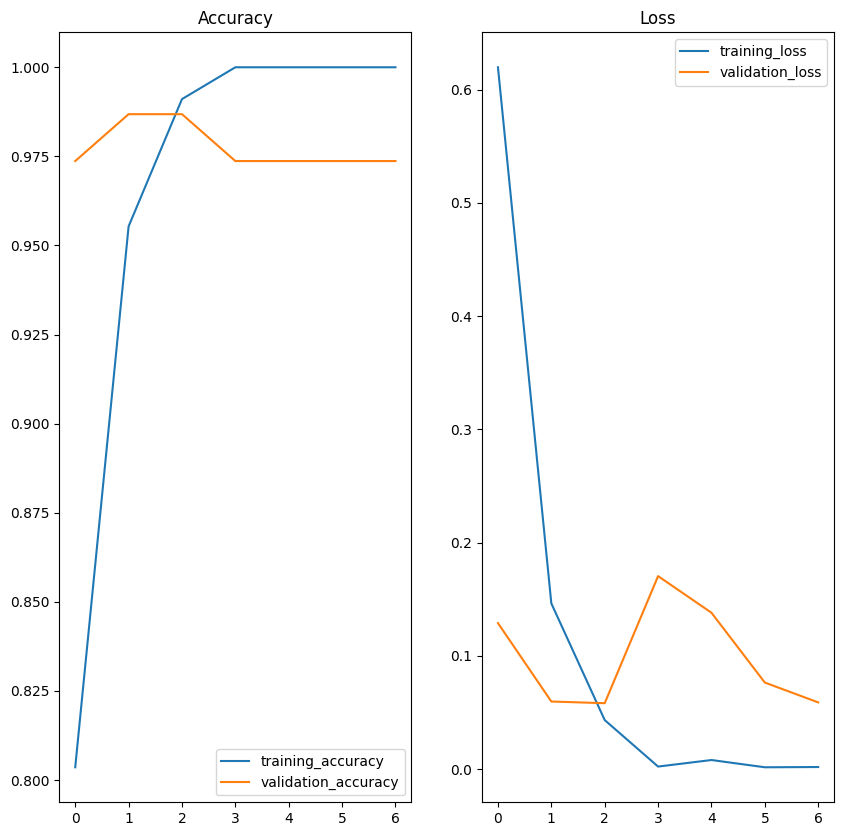

In [ ]:
accuracy = results.history['accuracy']
validation_accuracy = results.history['val_accuracy']
loss = results.history['loss']
validation_loss = results.history['val_loss']
epoch_number = range(len(accuracy)) # Dynamically set the number of epochs based on training history

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epoch_number, accuracy, label = 'training_accuracy')
plt.plot(epoch_number, validation_accuracy, label = 'validation_accuracy')
plt.legend(loc = 'lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epoch_number, loss, label = 'training_loss')
plt.plot(epoch_number, validation_loss, label = 'validation_loss')
plt.legend(loc = 'upper right')
plt.title('Loss')

In [ ]:
test_loss, test_accuracy = model.evaluate(test_ds_dtcwt, test_labels_processed)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

3/3 [==============================] - 70s 23s/step - loss: 0.0226 - accuracy: 0.9892
Test Loss: 0.022579532116651535
Test Accuracy: 0.9892473220825195


In [ ]:
num_batches = len(test_ds_dtcwt)
print("Number of batches in test_ds_dtcwt:", num_batches)

Number of batches in test_ds_dtcwt: 93


In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(results.history['accuracy'], label='train_accuracy')
plt.plot(results.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(results.history['loss'], label='train_loss')
plt.plot(results.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
preds = model.predict(test_ds_dtcwt)
predictions = []
for i in range(0, 93):
  predictions.append(np.argmax(tf.nn.softmax(preds[i])))

3/3 [==============================] - 70s 23s/step


In [ ]:
!pip install torchmetrics
!pip install torch

from torchmetrics import JaccardIndex
from torchmetrics.functional import dice
import torch

  Using cached torchmetrics-1.4.0.post0-py3-none-any.whl (868 kB)
  Using cached lightning_utilities-0.11.3.post0-py3-none-any.whl (26 kB)


In [ ]:
jaccard = JaccardIndex(task="multiclass", num_classes=2)

In [ ]:
print("This is the Jaccard index: " + str(jaccard(torch.from_numpy(np.array(predictions)), torch.from_numpy(np.array(test_labels).astype('float32')))))
print("This is the Dice Similarity Coefficient: " + str(dice(torch.from_numpy(np.array(test_labels).astype('float32')), torch.from_numpy(np.array(predictions)), average = 'micro')))

This is the Jaccard index: tensor(0.9787)
This is the Dice Similarity Coefficient: tensor(0.9888)


In [ ]:
from sklearn.metrics import confusion_matrix
x = confusion_matrix(torch.from_numpy(np.array(test_labels).astype('float32')), np.array(predictions))
print(x)

[[48  0]
 [ 1 44]]


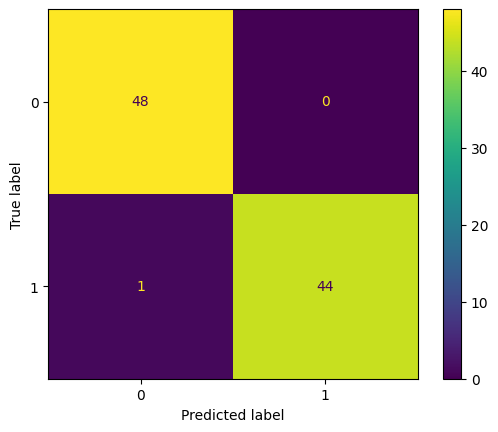

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# X, y = make_classification(random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                    random_state=0)
# clf = SVC(random_state=0)
# clf.fit(X_train, y_train)

# predictions = clf.predict(X_test)
# cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=x,
                              display_labels={0, 1})
disp.plot()

plt.show()